In [61]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [62]:
x=pd.read_csv("../Pandas Dataset/water_pump_faulty_train.csv")
y=pd.read_csv("../Pandas Dataset/water_pump_faulty_label.csv")
x_test=pd.read_csv("../Pandas Dataset/water_pump_faulty_test.csv")

In [63]:
x.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [64]:
x=x.drop(columns=["date_recorded","id","funder","installer","wpt_name","num_private","scheme_management","scheme_name"])
x_test=x_test.drop(columns=["date_recorded","id","funder","installer","wpt_name","num_private","scheme_management","scheme_name"])

In [65]:
x[["water_quality","quality_group"]].head(2)

,water_quality,quality_group
0,soft,good
1,soft,good


In [66]:
x[["quantity","quantity_group"]].head(2)

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient


In [67]:
x[["source","source_type","source_class"]].head(2)


,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface


In [68]:
x.source_class.value_counts()

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

In [69]:
x.source_type.value_counts()

source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64

In [70]:
x.source.value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [71]:
x.management.value_counts()

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64

In [72]:
x.management_group.value_counts()

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

In [73]:
x.extraction_type_class.value_counts()

extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

In [74]:
x.extraction_type_group.value_counts()

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

In [75]:
x[["region_code","district_code"]].head(2)

,region_code,district_code
0,11,5
1,20,2


In [76]:
x=x.drop(columns=["payment","water_quality","quantity","source","waterpoint_type","management","extraction_type_group","extraction_type","recorded_by","extraction_type",])
x_test=x_test.drop(columns=["payment","water_quality","quantity","source","waterpoint_type","management","extraction_type_group","extraction_type","recorded_by","extraction_type",])


In [77]:
x.head(3)

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,source_class,waterpoint_type_group
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,False,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe
2,25.0,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,True,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe


In [78]:
x.region.value_counts()

region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64

<Axes: >

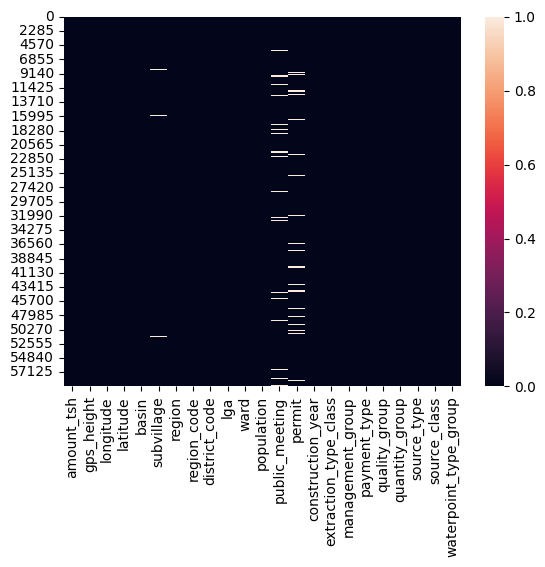

In [79]:
import seaborn as sns
sns.heatmap(x.isna())

In [80]:
x["public_meeting"] = x["public_meeting"].fillna(False).astype(bool)
x["permit"] = x["permit"].fillna(False).astype(bool)

x_test["public_meeting"] = x_test["public_meeting"].fillna(False).astype(bool)
x_test["permit"] = x_test["permit"].fillna(False).astype(bool)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\1151356101.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x["public_meeting"] = x["public_meeting"].fillna(False).astype(bool)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\1151356101.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x["permit"] = x["permit"].fillna(False).astype(bool)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\1151356101.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer

In [81]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()

In [82]:
x[["extraction_type_class","management_group","payment_type","quality_group","quantity_group","source_type","source_class","waterpoint_type_group"]].head()
x_test[["extraction_type_class","management_group","payment_type","quality_group","quantity_group","source_type","source_class","waterpoint_type_group"]].head()

,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,source_class,waterpoint_type_group
0,other,parastatal,never pay,good,seasonal,rainwater harvesting,surface,other
1,gravity,user-group,never pay,good,insufficient,spring,groundwater,communal standpipe
2,other,user-group,never pay,good,insufficient,rainwater harvesting,surface,other
3,other,user-group,unknown,good,dry,shallow well,groundwater,other
4,gravity,user-group,monthly,good,enough,spring,groundwater,communal standpipe


In [83]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [84]:
for col in ["quality_group", "quantity_group"]:
    x[[col]] = encoder.fit_transform(x[[col]]) 
    x_test[[col]] = encoder.fit_transform(x_test[[col]]) 

In [85]:
x=pd.get_dummies(x,columns=["region","basin","extraction_type_class","management_group","payment_type","source_type","source_class","waterpoint_type_group"],drop_first=True)

x_test=pd.get_dummies(x_test,columns=["region","basin","extraction_type_class","management_group","payment_type","source_type","source_class","waterpoint_type_group"],drop_first=True)

In [86]:
x.head(3)

,amount_tsh,gps_height,longitude,latitude,subvillage,region_code,district_code,lga,ward,population,public_meeting,permit,construction_year,quality_group,quantity_group,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390,34.938093,-9.856322,Mnyusi B,11,5,Ludewa,Mundindi,109,True,False,1999,2.0,1.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,0.0,1399,34.698766,-2.147466,Nyamara,20,2,Serengeti,Natta,280,False,True,2010,2.0,2.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False
2,25.0,686,37.460664,-3.821329,Majengo,21,4,Simanjiro,Ngorika,250,True,True,2009,2.0,1.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False


In [87]:
x.shape

(59400, 72)

In [88]:
village_values=x.subvillage.value_counts()

In [89]:
len(village_values[village_values.values>=30])

125

In [90]:
lga_values=x.lga.value_counts()

In [91]:
len(lga_values[lga_values.values>=30])

123

In [92]:
war_values=x.ward.value_counts()

In [93]:
len(war_values[war_values.values>=30])

718

In [94]:
x=x.drop(columns=["subvillage","ward"])
x_test=x_test.drop(columns=["subvillage","ward"])

In [95]:
x=pd.get_dummies(x,columns=["lga"])
x_test=pd.get_dummies(x_test,columns=["lga"])

In [96]:
x.shape

(59400, 194)

In [118]:
x.head(3)

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,public_meeting,permit,construction_year,quality_group,quantity_group,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,lga_Arusha Rural,lga_Arusha Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Lindi Urban,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui
0,6000.0,1390,34.938093,-9.856322,11,5,109,True,False,1999,2.0,1.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [97]:
from sklearn.preprocessing import OrdinalEncoder
ordinal=OrdinalEncoder()

In [98]:
y.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


In [99]:
y[["status_group"]]=ordinal.fit_transform(y[["status_group"]])

In [100]:
y=y["status_group"]

In [101]:
y.head()

0    0.0
1    0.0
2    0.0
3    2.0
4    0.0
Name: status_group, dtype: float64

In [102]:
len(set(y))

3

In [103]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [104]:
model.fit(x,y)

RandomForestClassifier()

In [105]:
y_pred=model.predict(x_test)

In [106]:
y_pred

array([0., 0., 0., ..., 0., 0., 2.])

In [107]:
y_pred_reshaped = y_pred.reshape(-1, 1)

# Now decode the array
decoded_y_pred = ordinal.inverse_transform(y_pred_reshaped)

In [108]:
decoded_y_pred

array([['functional'],
       ['functional'],
       ['functional'],
       ...,
       ['functional'],
       ['functional'],
       ['non functional']], dtype=object)

In [109]:
x_test=pd.read_csv("../Pandas Dataset/water_pump_faulty_test.csv")
x_test=x_test["id"]

In [110]:
decoded_y_pred=decoded_y_pred.ravel()

In [111]:
y_pred_series = pd.Series(decoded_y_pred)

In [112]:
y=pd.concat([x_test,y_pred_series],axis=1)

In [113]:
y.head()

,id,0
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [114]:
y.columns=["id","status_group"]

In [115]:
y.head(3)

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional


In [116]:
y.to_csv("water_pump_faulty.csv",index=False)

In [117]:
y.shape

(14850, 2)

Score: 0.8106

jubayer1202
id-279015
⸱
4h 50min ago